# Manas Dhanuka; Homework 6

In [176]:
#Importing packages
import pandas as pd
import numpy as np
import random 
import math

#setting seed as specified
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#for PCA
from sklearn.decomposition import PCA
from sklearn import preprocessing

#for K-means
from sklearn.cluster import KMeans

## Problem 1 

### 1A)

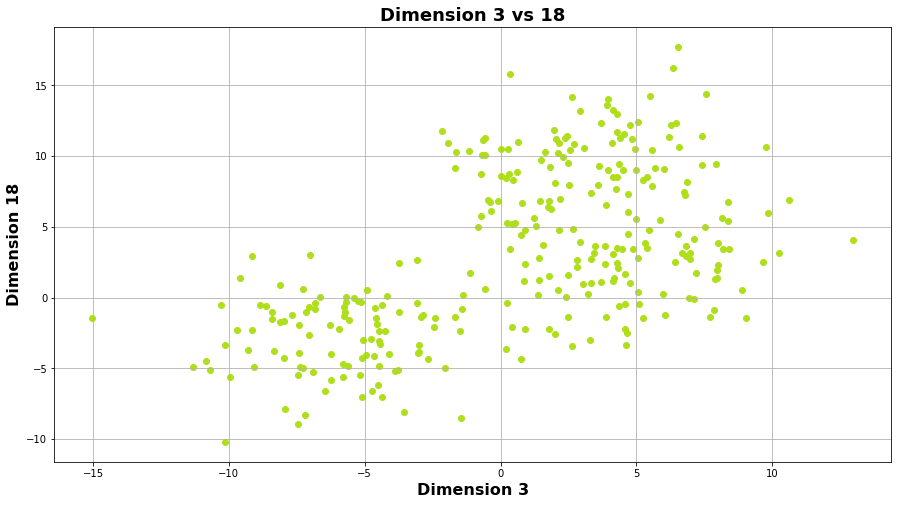

In [160]:
datapoints_df = pd.read_csv ('datapoints.csv')
dimension_3 = datapoints_df.iloc[:,2]
dimension_18 = datapoints_df.iloc[:,17]

plt.figure(figsize= [15,8])
plt.xlabel("Dimension 3",fontsize = 16 ,fontweight = 'bold')
plt.ylabel("Dimension 18",fontsize = 16 ,fontweight = 'bold')
plt.title("Dimension 3 vs 18",fontsize = 18 ,fontweight = 'bold')
plt.scatter(dimension_3, dimension_18, color = '#afdf1b')
plt.grid()
plt.show()

### 1B)

In [161]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Normalizing data
scaled_datapoints_df= sc.fit_transform(datapoints_df) 

#Performing PCA on the data
pca = PCA()
PC_data = pca.fit_transform(scaled_datapoints_df)
columns_pca = ['PC %i' % i for i in range(1, 21)]
pca_df = pd.DataFrame(PC_data, columns=columns_pca)

pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20
0,-3.113869,-2.532172,0.096166,0.185324,0.555744,-0.494945,0.292862,1.105187,-0.169302,-0.092529,0.094455,-0.244863,0.171160,0.039969,0.396513,0.549275,0.249504,0.029750,-0.630281,0.133506
1,-2.872880,-1.495775,-0.759959,1.312882,-0.377708,-1.379350,-0.202223,0.298977,0.075088,-0.982829,-0.103311,-0.130485,0.545735,0.943017,-0.589967,-0.304988,0.351901,-0.185448,-0.172782,0.230824
2,-1.520137,2.945296,-0.103888,0.761275,0.069016,-0.383623,-0.028066,-0.777222,0.731903,0.680531,0.866419,-0.753357,-1.140484,0.105570,0.097766,0.142743,-0.281264,0.021052,-0.714013,-0.291679
3,2.956187,-0.627534,-1.041199,-0.501407,-0.062864,-0.041759,-0.631467,0.926523,0.512896,-0.242742,-0.169705,0.547055,-0.074156,-0.340898,0.804448,-0.215219,-0.374926,-0.403022,-0.012356,0.339519
4,3.309341,-0.673007,-0.997370,1.188107,-0.418880,0.268477,-0.674102,0.272727,0.346649,1.117799,-0.470771,0.625851,-0.413139,-0.275758,0.179786,-0.515685,0.410835,0.418016,0.182096,0.076664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.187343,3.510869,0.839288,0.296376,2.242949,-1.149731,0.506175,1.242261,0.849060,-0.830203,-0.431412,-0.892308,-0.019625,0.099841,1.138216,0.106458,-0.045551,0.517004,-0.493406,0.447055
296,-0.686275,4.596637,0.497657,-0.806716,0.033643,-0.332601,0.166252,0.016599,-0.296968,0.084548,-0.405587,0.051344,0.284044,0.305071,0.190478,-0.478294,-0.207072,-0.087442,-0.025244,0.471903
297,3.072018,-0.629207,0.939475,0.628192,-0.120754,0.350145,-0.600639,0.136778,0.375257,1.319473,-0.316987,0.311987,-0.196431,-0.207538,-0.579439,0.462032,0.947505,0.160500,-0.350491,0.116226
298,-1.499135,3.999160,0.001098,-0.962411,-0.879967,-0.852304,-0.250173,0.137105,-1.316100,0.459481,0.530084,0.095711,0.150891,-0.699734,0.396404,-0.508875,-0.347351,-0.318611,0.846166,0.444691


### 1C)

In [162]:
#Calculating the Percentage of variance captured by each principle component
varinace_percentage = np.round(pca.explained_variance_ratio_* 100, decimals=1)

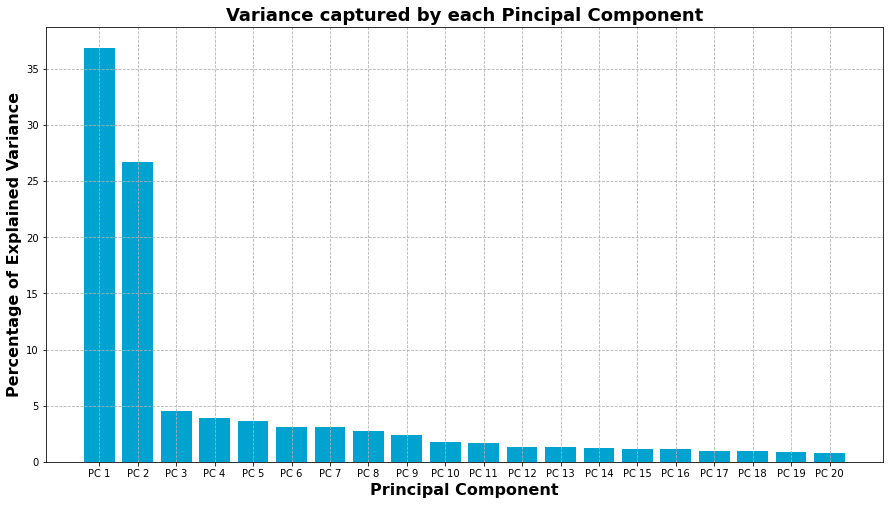

In [163]:
x_labels = ['PC ' + str(x) for x in range(1, len(varinace_percentage)+1)]
plt.figure(figsize= [15,8])
plt.ylabel('Percentage of Explained Variance',fontsize = 16 ,fontweight = 'bold')
plt.xlabel('Principal Component',fontsize = 16 ,fontweight = 'bold')
plt.title('Variance captured by each Pincipal Component',fontsize = 18,fontweight = 'bold')
plt.grid(linestyle = '--')
plt.bar(x=range(1,len(varinace_percentage)+1), height=varinace_percentage, tick_label=x_labels, color = '#00a2d0')
plt.show()

In [164]:
print("Variance Captured by first three principle components is",sum(varinace_percentage[0:4]))

Variance Captured by first three principle components is 72.0


Yes, PCA is good a good method to reduce the analysis of this data since the first three principle components can account for 72% of the variance in the whole data. 

### 1D)

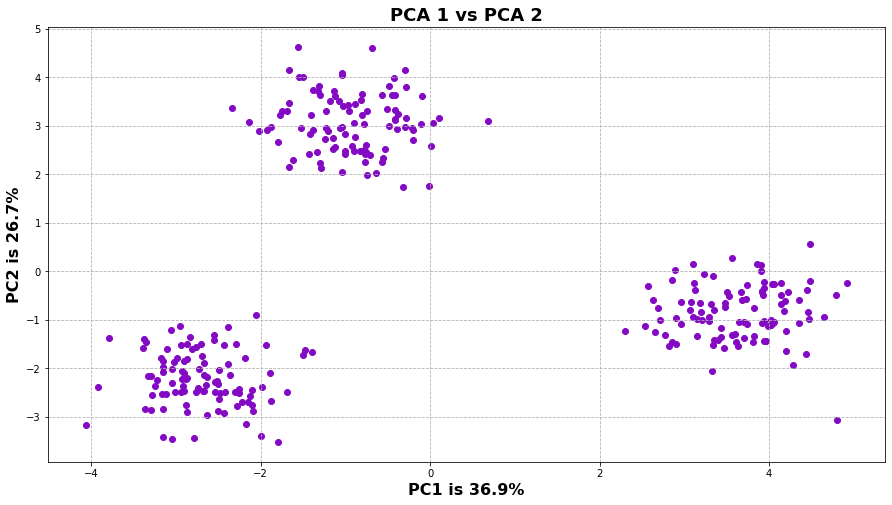

In [165]:
#PLotting PC 1 vs PC 2
plt.figure(figsize= [15,8])
plt.title('PCA 1 vs PCA 2',fontsize = 18,fontweight = 'bold')
plt.xlabel('PC1 is {0}%'.format(varinace_percentage[0]),fontsize = 16 ,fontweight = 'bold')
plt.ylabel('PC2 is {0}%'.format(varinace_percentage[1]),fontsize = 16 ,fontweight = 'bold')
plt.grid(linestyle = '--')
plt.scatter(pca_df["PC 1"], pca_df["PC 2"], color = '#8309c3')
 
plt.show()

## Problem 2

### 2A)

In [166]:
#Defining all the K values
K = range(1, 21)

#Defining empty list to store squared distances
sq_dist = []

for k in range(1,21):
    
    K_model = KMeans(n_clusters = k, init = "k-means++")
    K_model.fit(pca_df)
    
    #list containing all the squared distances
    sq_dist.append(K_model.inertia_)
    

C:\Users\manas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


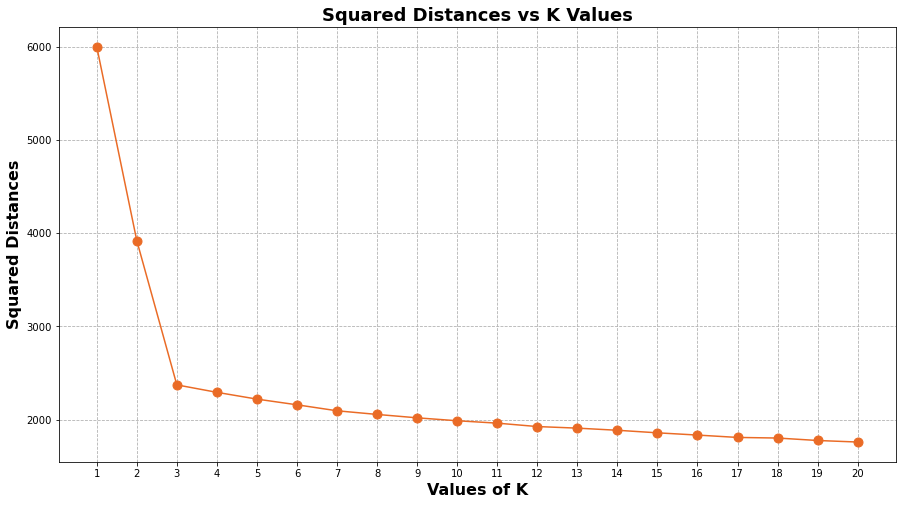

In [167]:
#Plotting the squared distances
plt.figure(figsize= [15,8])
plt.xlabel('Values of K',fontsize = 16 ,fontweight = 'bold')
plt.xticks(K)
plt.ylabel('Squared Distances',fontsize = 16 ,fontweight = 'bold')
plt.title('Squared Distances vs K Values',fontsize = 18,fontweight = 'bold')
plt.plot(K, sq_dist, '.-', markersize = 18, color = '#ea6b26')
plt.grid(linestyle = '--')
plt.show()

From the above graph, we can see the line elbows at the K =3 and moves in a linear fashion for all following values of K. Hence 3 is the ideal number of clusters for the data.

### 2B)

In [177]:
two_datapoints_df = datapoints_df.iloc[:,0:2]# making a dataframe with just the first two columns of the original data 

In [178]:
def starting_centeroid_generator(data_df,num_cent):
    '''This function takes in a dataframe and number of starting centroids to be generated.
    The function returns a dataframe that has the specified number of centroids as the rows of the dataframe '''
    
    starting_centeroids_index=[] #list to store indexes of the randomly generated indexes for the centroids 
    
    for nc in range(0,num_cent):
        starting_centeroids_index.append(random.randint(0,len(two_datapoints_df)-1))
    
    starting_centeroids_list=[]  
    
    for index in starting_centeroids_index:
        starting_centeroids_list.append(two_datapoints_df.iloc[index])
        
    starting_centeroids= pd.DataFrame(starting_centeroids_list, columns = ['0','1'])
        
    return starting_centeroids

In [179]:
def euclidist(p1,p2): 
    '''Function takes in two coordinates and calculates the euclidean distance between them.
    The functions returns the calculated distance '''
    
    dist = math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    
    return dist

In [180]:
def cluster_assigner(centeroids, data_df):
    """Function takes in two dataframes. The first one is a centeroid dataframes, that has the rows as the centroid's 
    coordinates. The second dataframe is the data that is to be assigned clusters. The function then calcutes the euclidean
    between each point in the data and the centeroids, and assigns labels according to the the centroid that is closest.
    If closest to the first centroid in the centroid dataframe the point gets labelled 0 and so on. The Function returns
    a list with the cluster labels for all the data point in the dataframe at the corresponding index in the list as in
    the original dataframe."""
    
    list_cluster_assigned=[]
    
    for index, row in data_df.iterrows() : #parsing the dataframe first
        p1 = [row['0'],row['1']]
        list_eucdist =[]
        
        for index, row in centeroids.iterrows(): #parsing the centroid dataframe
            p2 = [row['0'],row['1']]
            
            list_eucdist.append(euclidist(p1,p2)) #calculing the distance between datapoints and centroids
            
        #assigning cluster label according to minimum distance of the point from all three centroids and appending in a list
        list_cluster_assigned.append(list_eucdist.index(min(list_eucdist)))     
        
    return list_cluster_assigned


In [181]:
def new_centeroid_calculator(list_cluster_assigned, data_df):
    
    '''This function takes in a list with the labels for which group each point in the dataframe belongs to and the
    original dataframe. It calculates the new centroid by grouping the data according to the cluster label
    and then calculating the mean of labelled data. It returns a list that has the labelled dataframe as the first 
    element and a dataframe of the revised centroids as the second element'''
    
    #creating a copy so as to not modify the original data
    data_df_clusterlabeled = data_df.copy() 
    #adding the labels list as another column in the copy created in the line above.
    data_df_clusterlabeled.insert(2,'cluster_assigned',list_cluster_assigned)
    #calculating the mean values after grouping by the cluster label.
    revised_centeroids = data_df_clusterlabeled.groupby(['cluster_assigned']).mean().values
    #converting into a dataframe
    revised_centeroids_df = pd.DataFrame(revised_centeroids,columns = ['0','1'])
    
    return [data_df_clusterlabeled, revised_centeroids_df]
    

In [182]:
def K_mean_runs(starting_centeroids,data_df,iter_num):
    '''This function takes in the starting centroids and the number of iterations and performs the steps of the 
    K-means algorithm the specified number of times. The Function returns a list where the first element is the
    cluster label assigned dataframe and the second element is the dataframe containing the final centroid co-ordinates'''
    
    for i in range(0,iter_num):
        
        #calling functions defined above
        clusters_assigned = cluster_assigner(starting_centeroids, data_df)
        labelled_data_and_new_centeroids = new_centeroid_calculator(clusters_assigned, data_df)
        #revising the starting centroid before reassigning labels
        starting_centeroids = labelled_data_and_new_centeroids[1]         
        
    return labelled_data_and_new_centeroids

In [183]:
#Function Calls 
num_iter = 10

#defining starting centroids
starting_centeroids = starting_centeroid_generator(two_datapoints_df,3)

#runnig the algorithm 10 times
lab_data_and_centeroids = K_mean_runs(starting_centeroids,two_datapoints_df,num_iter )

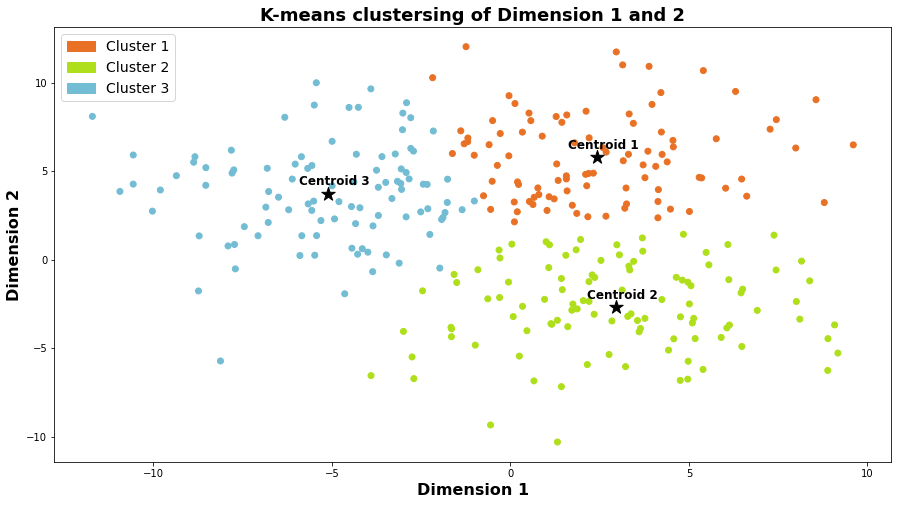

In [184]:
labelled_data = lab_data_and_centeroids[0]
final_centeroids= lab_data_and_centeroids[1]
#defining colors for the clusters
k_colors = {0:'#e97125', 1:'#afdf1b',2:'#72bcd4'}

#Plotting the data
plt.figure(figsize= [15,8])
plt.xlabel("Dimension 1",fontsize = 16 ,fontweight = 'bold')
plt.ylabel("Dimension 2",fontsize = 16 ,fontweight = 'bold')
plt.title("K-means clustersing of Dimension 1 and 2",fontsize = 18 ,fontweight = 'bold')
#Plotting datapoints from the labelled data and coloring according to the cluster assigned label column. 
plt.scatter(labelled_data["0"], labelled_data["1"],c=labelled_data["cluster_assigned"].map(k_colors))

#codeblock to add legend
cp = []
for color_key in k_colors:
    color_patch = mpatches.Patch(color=k_colors[color_key], label='Cluster '+ str(color_key+1))
    cp.append(color_patch)
plt.legend(handles = cp, fontsize = 14)

plt.scatter(final_centeroids['0'], final_centeroids['1'],color = "black", s=200, marker = '*', label = 'Centroids')

#Annotating the centroids
for index, row in final_centeroids.iterrows() :
        c = [row['0'],row['1']]
        plt.annotate('Centroid ' + str(index+1),xy = (c[0],c[1]),xytext=(c[0]-0.8,c[1]+0.5) ,fontsize = 12, fontweight = 'bold')

plt.show()